# Module 5 : LinearRegression

In [1]:
#import library packages
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
del df['Adj Close']

In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [8]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-22,159.300003,162.139999,157.809998,157.830002,75701800
2023-03-23,158.830002,161.550003,157.679993,158.929993,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,45939800


In [9]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Close', axis=1)
#Response variable
y = df.loc[:,'Close']  

In [10]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  7463
Number of test dataset:  3199
Total number of dataset:  10662


##### Implementing LinearRegression Algo

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,median_absolute_error

Training

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predicted = lr.predict(X_test)

Finding mean_absolute_error

In [13]:
MAE= (mean_absolute_error(y_test,predicted))
print('MEAN ABSOLUTE ERROR VALUE IS :',MAE)

MEAN ABSOLUTE ERROR VALUE IS : 0.08536451239983976


Finding mean_squared_error

In [14]:
MSE=(mean_squared_error(y_test,predicted))
print('MEAN SQUARED ERROR VALUE IS :',MSE)

MEAN SQUARED ERROR VALUE IS : 0.07537444717544817


Finding median_absolute_error

In [15]:
MedianAE=(median_absolute_error(y_test,predicted))
print('MEDIAN ABSOLUTE ERROR VALUE IS :',MedianAE)

MEDIAN ABSOLUTE ERROR VALUE IS : 0.005820388781060226


Finding r2_score

In [16]:
R2=(r2_score(y_test,predicted))
print('R2_SCORE VALUE IS :',R2*100)

R2_SCORE VALUE IS : 99.99410956029129


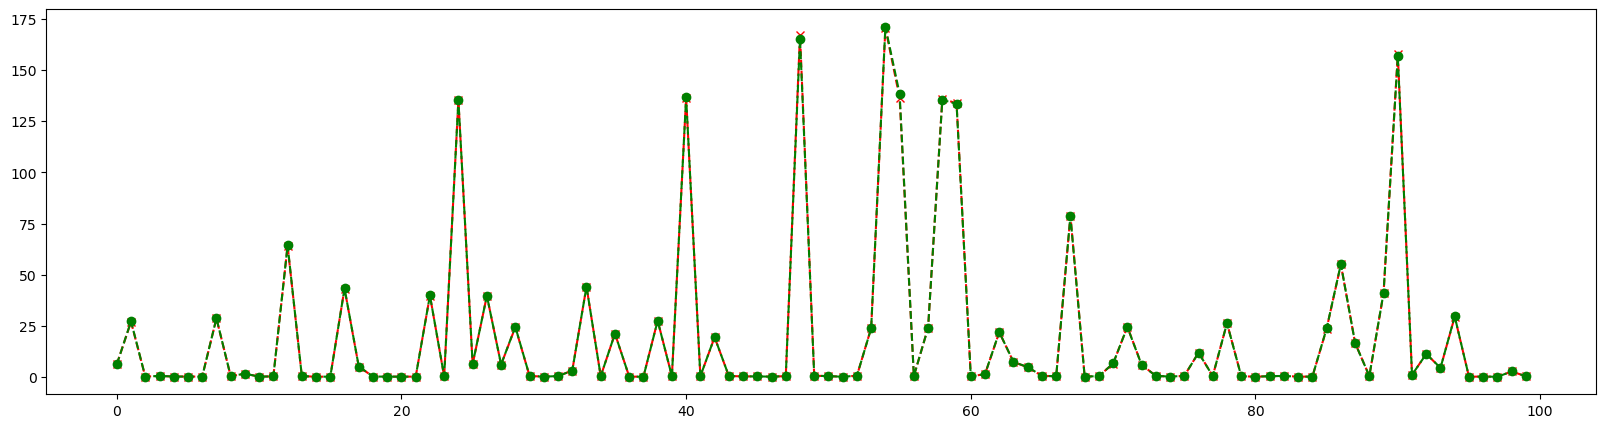

In [17]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [18]:
import joblib
joblib.dump(lr, 'LR.pkl')

['LR.pkl']